**OpenCV**

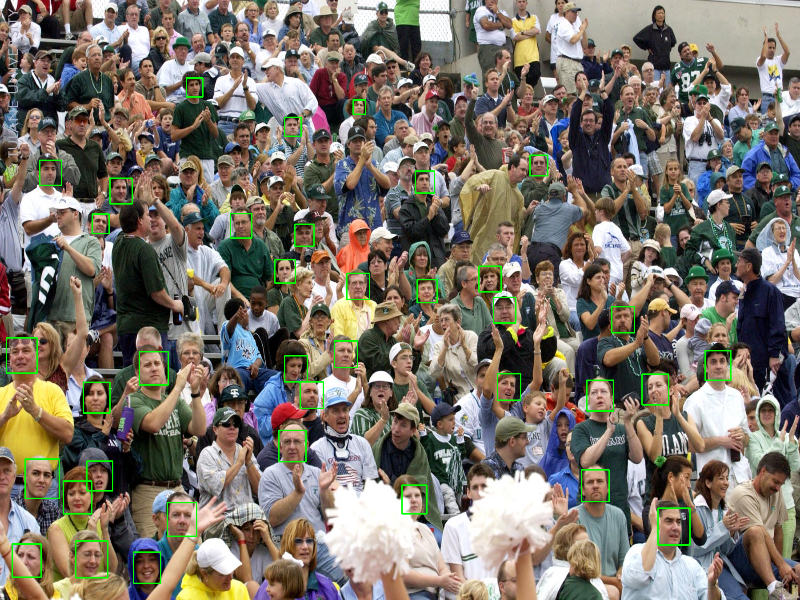

Number of faces detected: 37
Execution time: 1.0189018249511719 seconds


In [1]:
import cv2
import requests
import numpy as np
from google.colab.patches import cv2_imshow
import time

# Download the image from the given URL
url = "https://raw.githubusercontent.com/kornia/data/main/crowd.jpg"
response = requests.get(url)
img_array = np.array(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale for face detection
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform face detection
start_time = time.time()
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

# Measure the time taken for face detection
execution_time_opencv = time.time() - start_time

# Draw bounding boxes around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Resize the image for display
resized_img = cv2.resize(img, (800, 600))  # Adjust the size as needed

# Display the resized image with bounding boxes
cv2_imshow(resized_img)

# Display the number of detected faces and execution time
print(f"Number of faces detected: {len(faces)}")
print(f"Execution time: {execution_time_opencv} seconds")


**Kornia**

In [2]:
%%capture
!pip install kornia
!pip install kornia-rs

import io
import requests
import cv2
import kornia as K
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia.contrib import FaceDetector, FaceDetectorResult
from google.colab.patches import cv2_imshow

def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename

url = "https://raw.githubusercontent.com/kornia/data/main/crowd.jpg"
download_image(url)

# select the device and type
device = torch.device("cpu")  # use 'cuda:0'
dtype = torch.float32

# load the image (face detector expects an image in the range 0-255 (8 bits))
img = K.io.load_image("crowd.jpg", K.io.ImageLoadType.RGB8, device=device)[None, ...].to(dtype=dtype)  # BxCxHxW
img_vis = K.tensor_to_image(img.byte())  # to later visualize

# create the detector and find the faces!
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    # Measure the time taken for face detection
    start_time = time.time()
    dets = face_detection(img)
    execution_time_kornia = time.time() - start_time

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

# Draw bounding boxes around the detected faces
for b in dets:
    top_left = b.top_left.int().tolist()
    bottom_right = b.bottom_right.int().tolist()
    scores = b.score.tolist()

    for score, tp, br in zip(scores, top_left, bottom_right):
        x1, y1 = tp
        x2, y2 = br

        if score < 0.7:
            continue  # skip detection with low score
        img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding boxes using cv2_imshow
cv2_imshow(img_vis)

# Display the number of detected faces and execution time
print(f"Number of faces detected: {len(dets)}")
print(f"Execution time: {execution_time_kornia} seconds")


In [3]:
import io

import requests

def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename

url = "https://raw.githubusercontent.com/kornia/data/main/crowd.jpg"
download_image(url)

'crowd.jpg'

In [4]:
import cv2
import kornia as K
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia.contrib import FaceDetector, FaceDetectorResult

# select the device and type
device = torch.device("cpu")  # use 'cuda:0'
dtype = torch.float32

In [5]:
# load the image (face detector expects a image in rage 0-255 (8 bits))
img = K.io.load_image("crowd.jpg", K.io.ImageLoadType.RGB8, device=device)[None, ...].to(dtype=dtype)  # BxCxHxW
img_vis = K.tensor_to_image(img.byte())  # to later visualize

In [6]:
# create the detector and find the faces!
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    # Measure the time taken for face detection
    start_time = time.time()
    dets = face_detection(img)
    execution_time_kornia = time.time() - start_time

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

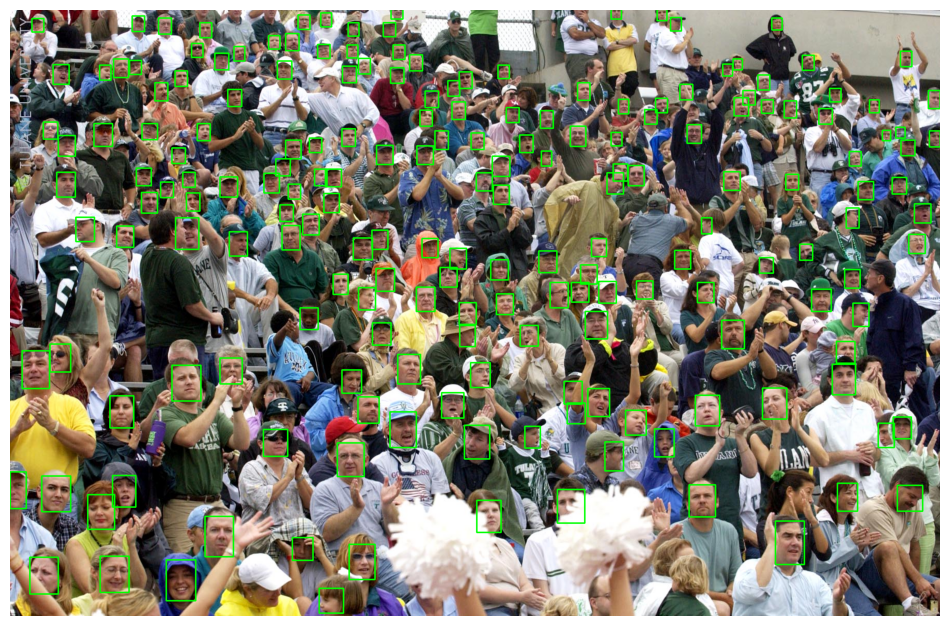

Number of faces detected: 192
Execution time: 4.117433309555054 seconds


In [7]:
# create the detector and find the faces!
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    # Measure the time taken for face detection
    start_time = time.time()
    dets = face_detection(img)
    execution_time_kornia = time.time() - start_time

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

# Draw bounding boxes around the detected faces and count the number of faces
num_faces = 0
for b in dets:
    top_left = b.top_left.int().tolist()
    bottom_right = b.bottom_right.int().tolist()
    scores = b.score.tolist()

    for score, tp, br in zip(scores, top_left, bottom_right):
        x1, y1 = tp
        x2, y2 = br

        if score < 0.7:
            continue  # skip detection with low score
        num_faces += 1

        # Use the original image (img_vis) for visualization without color changes
        img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(12, 12))
plt.imshow(img_vis)
plt.axis("off")
plt.show()

# Display the number of detected faces and execution time
print(f"Number of faces detected: {num_faces}")
print(f"Execution time: {execution_time_kornia} seconds")
